# Temperature Prediction

In [22]:
import pandas as pd

import seaborn as sns

sns.set_style("whitegrid")

In [2]:
FIGSIZE = (17, 5)

In [3]:
# London Weather data
df = pd.read_csv('data/weather_data_analysis/processed_heathrow_hourly.csv')

In [4]:
df['date'] = pd.to_datetime(df['time'], unit='s')

df = df.set_index('date', drop=True).sort_index()

df = df[:'2019-12-31']

In [5]:
df.head(2)

,cloudCover,windGust,humidity,temperature,visibility,windBearing,windSpeed,pressure,dewPoint,precipType,time,ozone,precipIntensity,icon,uvIndex,apparentTemperature,precipProbability,summary
date,,,,,,,,,,,,,,,,,,
2009-01-02 00:00:00,0.75,2.06,0.83,2.0,4.688,41.0,2.06,1029.69,-0.66,NaN,1230854400,NaN,0.0,partly-cloudy-night,0.0,-0.19,0.0,Mostly Cloudy
2009-01-02 01:00:00,1.00,1.23,0.87,2.0,4.509,20.0,1.02,1029.21,0.01,NaN,1230858000,NaN,0.0,cloudy,0.0,2.00,0.0,Overcast


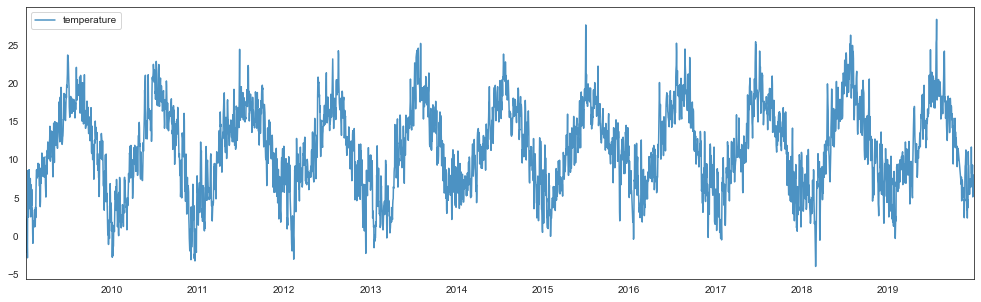

In [6]:
fig = (
    df
     [['temperature']]
    .groupby(df.index.date)
    .mean()
    .plot(figsize=FIGSIZE, alpha=0.8)
);

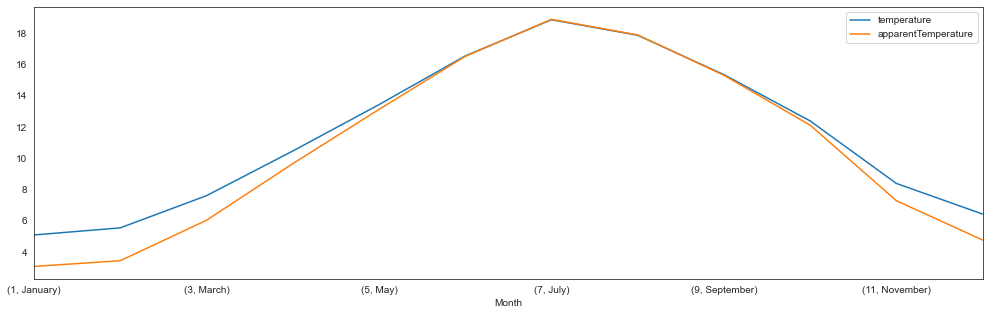

In [7]:
# By month
fig = (
    df
     [['temperature', 'apparentTemperature']]
     .groupby([df.index.month, df.index.month_name()])
     .mean()
     .plot(figsize=FIGSIZE)
)

fig.set_xlabel('Month');

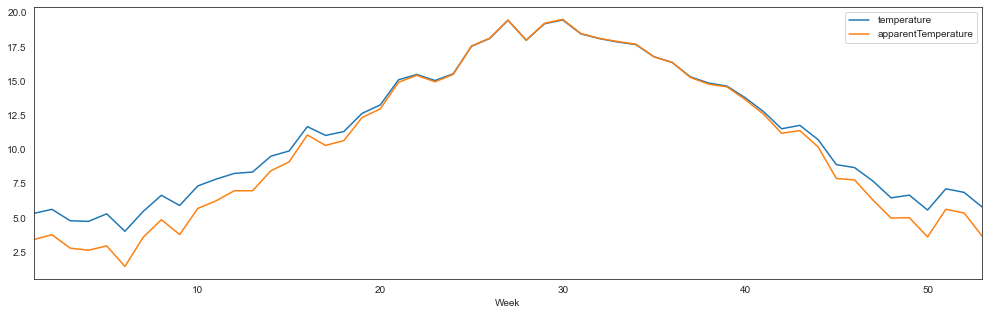

In [8]:
# By Week
fig = (
    df
     [['temperature', 'apparentTemperature']]
     .groupby([df.index.week])
     .mean()
     .plot(figsize=FIGSIZE)
);

fig.set_xlabel('Week');

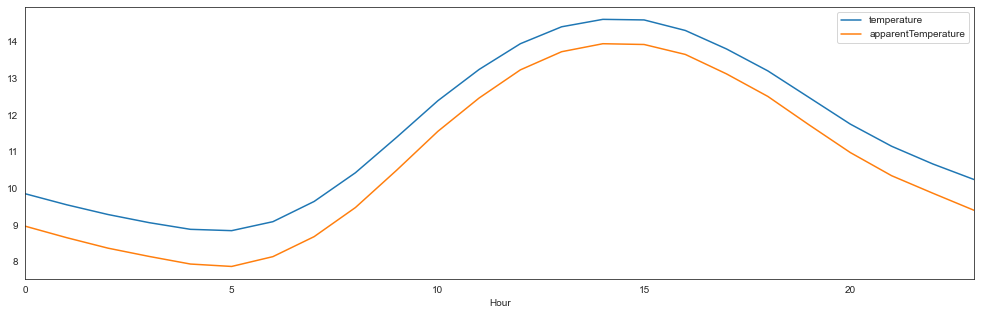

In [9]:
# By hour
fig = (
    df
     [['temperature', 'apparentTemperature']]
    .groupby([df.index.hour])
    .mean()
    .plot(figsize=FIGSIZE)
);

fig.set_xlabel('Hour');

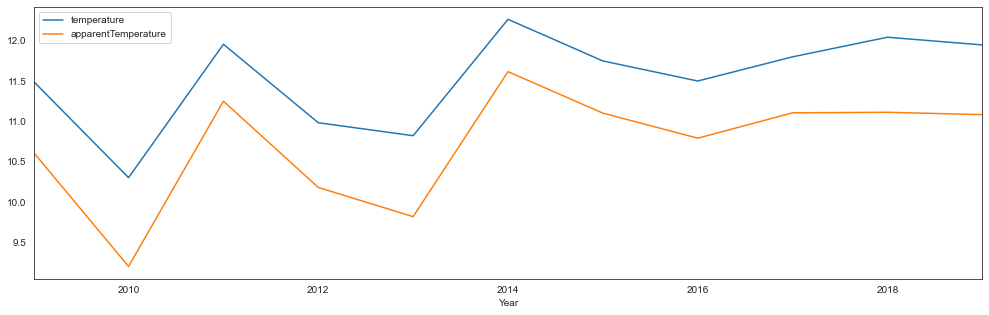

In [10]:
# By year
fig = (
    df
     [['temperature', 'apparentTemperature']]
    .groupby([df.index.year])
    .mean()
    .plot(figsize=FIGSIZE)
);

fig.set_xlabel('Year');

windSpeed vs Aparent temperature graph has an interesting shape

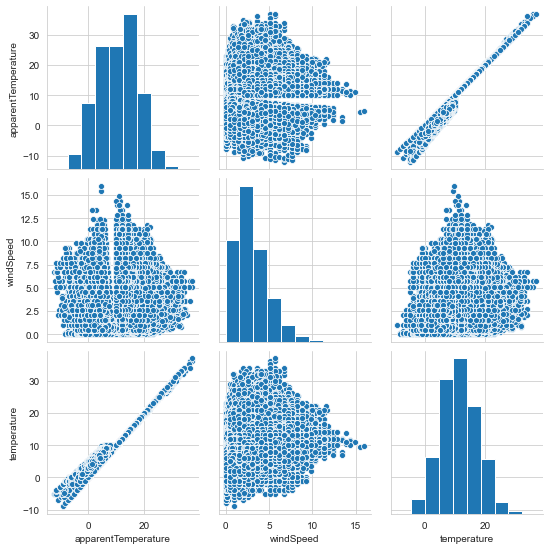

In [25]:
sns.pairplot(df[['apparentTemperature', 'windSpeed', 'temperature']])